In [35]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
plt.style.use('dark_background')

rts_gmlc_dir = Path("/Users/dguittet/Projects/Dispatches/workspace/deterministic_with_network_simulation_output_year")
rts_gmlc_data = Path("/Users/dguittet/Projects/Dispatches/Prescient/downloads/rts_gmlc/RTS-GMLC/RTS_Data/SourceData")

bus_detail_df = pd.read_csv(rts_gmlc_dir / "bus_detail.csv")
bus_detail_df['LMP'] = bus_detail_df['LMP'].astype('float64')
bus_detail_df['LMP DA'] = bus_detail_df['LMP DA'].astype('float64')
print(bus_detail_df.columns)

source_detail_df = pd.read_csv(rts_gmlc_data / "gen.csv")
bus_names = pd.read_csv(rts_gmlc_data / "bus.csv")

Index(['Date', 'Hour', 'Minute', 'Bus', 'Demand', 'Shortfall',
       'Overgeneration', 'LMP', 'LMP DA'],
      dtype='object')


In [36]:
# compile bus id to name dict

bus_dict = {k: v for k, v in zip(bus_names['Bus ID'].values, bus_names['Bus Name'].values)}


In [37]:
zeroLMP_per_bus = {}
for bus in bus_detail_df['Bus'].unique():
    df_bus = bus_detail_df[bus_detail_df['Bus'] == bus]
    total_curtailment = df_bus[df_bus['LMP'] < 3]['LMP']
    zeroLMP_per_bus[bus] = len(total_curtailment)

zeroLMP_per_bus = {k: v for k, v in sorted(zeroLMP_per_bus.items(), key=lambda item: item[1])}
max_zeroLMP = max(v for k, v in zeroLMP_per_bus.items())
zeroLMP_per_bus


{'Abel': 1730,
 'Adams': 1730,
 'Agricola': 1730,
 'Aiken': 1730,
 'Alber': 1730,
 'Alder': 1730,
 'Alger': 1730,
 'Ali': 1730,
 'Allen': 1730,
 'Anna': 1730,
 'Archer': 1730,
 'Arne': 1730,
 'Austen': 1730,
 'Bach': 1730,
 'Bacon': 1730,
 'Baffin': 1730,
 'Bailey': 1730,
 'Bain': 1730,
 'Bajer': 1730,
 'Baker': 1730,
 'Balch': 1730,
 'Balzac': 1730,
 'Banks': 1730,
 'Bardeen': 1730,
 'Barkla': 1730,
 'Barlow': 1730,
 'Barry': 1730,
 'Barton': 1730,
 'Basov': 1730,
 'Bates': 1730,
 'Bayle': 1730,
 'Bede': 1730,
 'Beethoven': 1730,
 'Behring': 1730,
 'Bell': 1730,
 'Bloch': 1730,
 'Bordet': 1730,
 'Adler': 1731,
 'Arnold': 1731,
 'Asser': 1731,
 'Attar': 1731,
 'Attila': 1731,
 'Avery': 1731,
 'Arthur': 1733,
 'Curtiss': 1746,
 'Comte': 1747,
 'Clive': 1755,
 'Caxton': 1758,
 'Cecil': 1758,
 'Carter': 1759,
 'Carew': 1760,
 'Carrel': 1760,
 'Clark': 1760,
 'Cobb': 1760,
 'Cabell': 1761,
 'Cabot': 1761,
 'Caine': 1761,
 'Calvin': 1761,
 'Camus': 1761,
 'Caruso': 1761,
 'Cary': 1761,
 'Ch

Text(0.5, 0.98, 'LMPs at Aubrey')

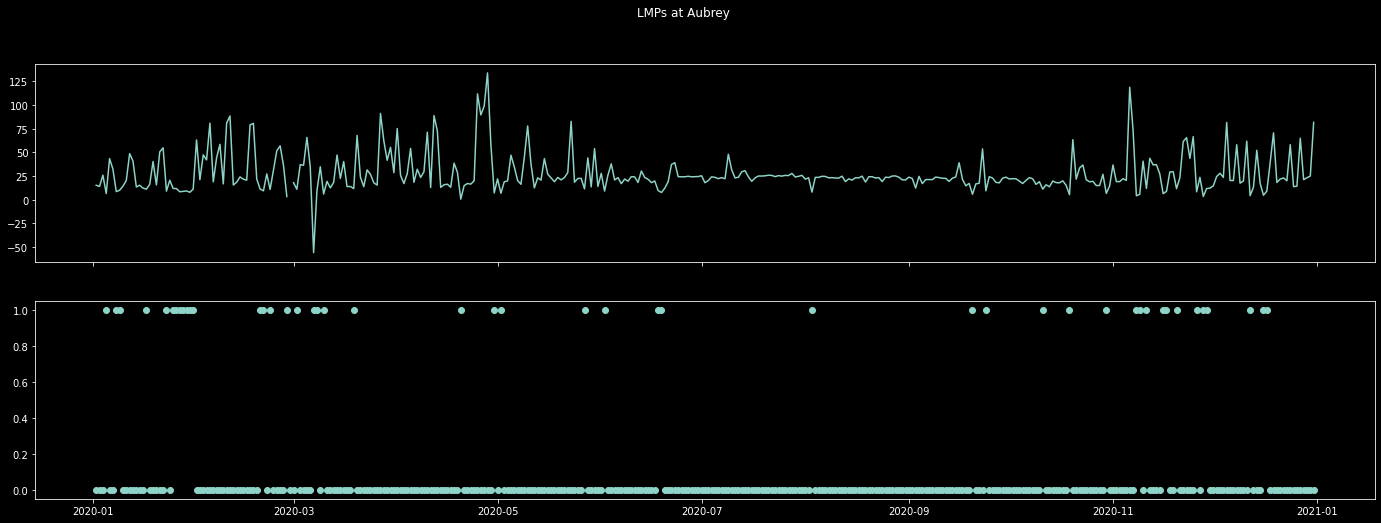

In [38]:
bus = "Aubrey"
start_date = pd.Timestamp('2020-01-02 00:00:00')
ix = pd.date_range(start=start_date, 
                    end=start_date
                    + pd.offsets.DateOffset(days=365)
                    - pd.offsets.DateOffset(hours=1),
                    freq='1H')
ix = ix[(ix.day != 29) | (ix.month != 2)]
df_bus = pd.DataFrame(index=ix)
df_bus['LMP'] = [min(i, 200) for i in bus_detail_df[bus_detail_df['Bus'] == bus]['LMP'].values]
df_bus['low LMP'] = [1 if i < 5 else 0 for i in bus_detail_df[bus_detail_df['Bus'] == bus]['LMP'].values]

fig, ax = plt.subplots(2,1,figsize=(24, 8),sharex=True)
df_resampled = df_bus.resample('1D').mean()
df_resampled['low LMP'] = [1 if i < 12 else 0 for i in df_resampled['LMP'].values]

ax[0].plot(df_resampled['LMP'])
ax[1].scatter(df_resampled['low LMP'].index, df_resampled['low LMP'])
plt.suptitle(f"LMPs at {bus}")

Text(0.5, 0.98, 'LMPs at Caesar')

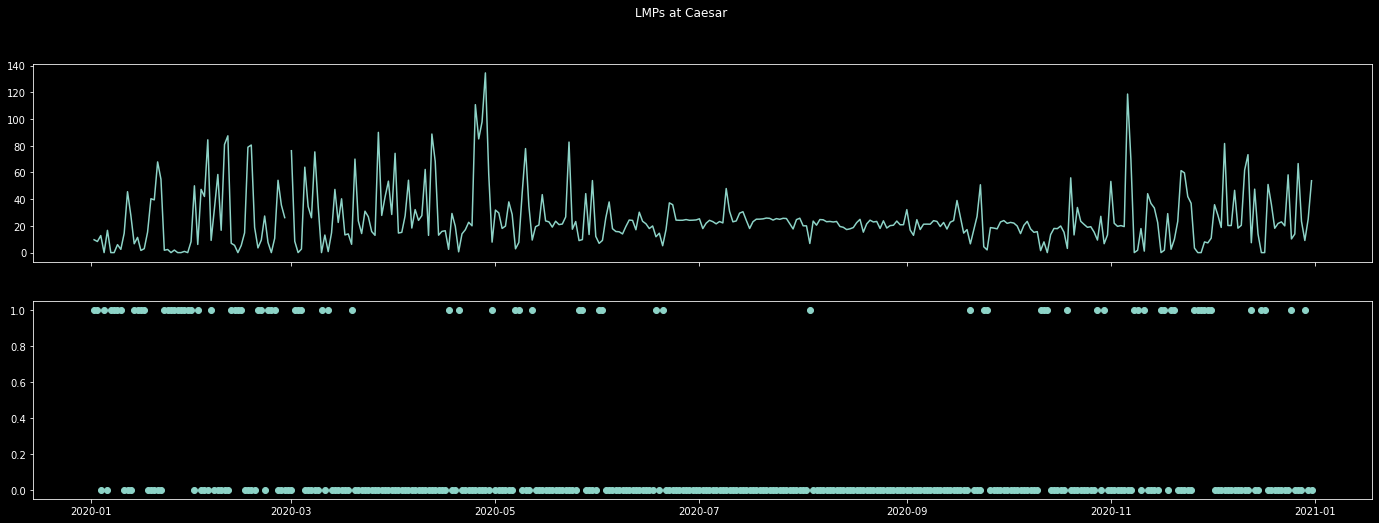

In [39]:
bus = "Caesar"
start_date = pd.Timestamp('2020-01-02 00:00:00')
ix = pd.date_range(start=start_date, 
                    end=start_date
                    + pd.offsets.DateOffset(days=365)
                    - pd.offsets.DateOffset(hours=1),
                    freq='1H')
ix = ix[(ix.day != 29) | (ix.month != 2)]
df_bus = pd.DataFrame(index=ix)
df_bus['LMP'] = [min(i, 200) for i in bus_detail_df[bus_detail_df['Bus'] == bus]['LMP'].values]
df_bus['low LMP'] = [1 if i < 5 else 0 for i in bus_detail_df[bus_detail_df['Bus'] == bus]['LMP'].values]

fig, ax = plt.subplots(2,1,figsize=(24, 8),sharex=True)
df_resampled = df_bus.resample('1D').mean()
df_resampled['low LMP'] = [1 if i < 12 else 0 for i in df_resampled['LMP'].values]

ax[0].plot(df_resampled['LMP'])
ax[1].scatter(df_resampled['low LMP'].index, df_resampled['low LMP'])
plt.suptitle(f"LMPs at {bus}")

122_WIND_1 274150.8232239998 384.23380970427445
303_WIND_1 521526.6801299997 686.6615829405708
309_WIND_1 20692.343494 139.53030002697236
317_WIND_1 136374.32431400003 170.6598977774997


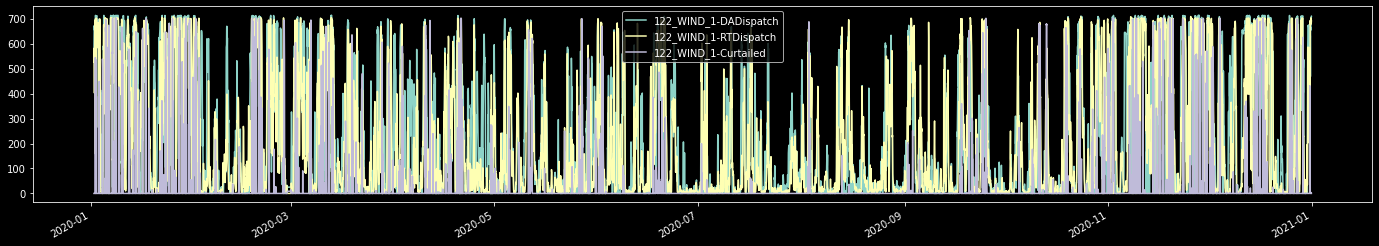

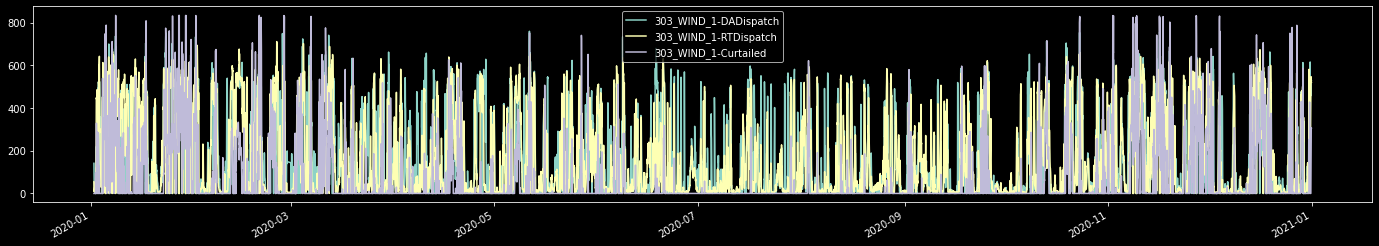

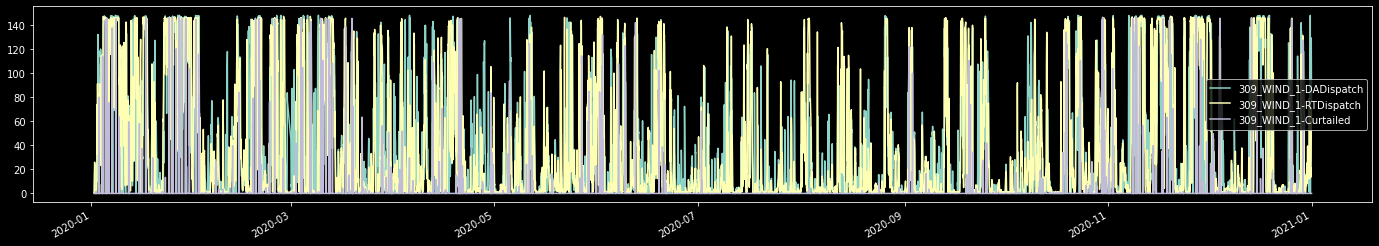

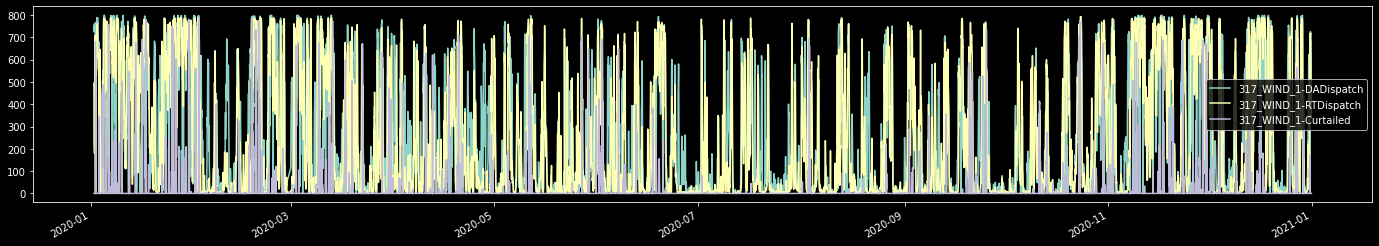

In [40]:
renewables_df = pd.read_csv(rts_gmlc_dir / "renewables_detail.csv")
df_curtailment = pd.DataFrame(index=ix)
wind_gens = []
for gen in renewables_df['Generator'].unique():
    if 'WIND' in gen:
        df_gen = pd.DataFrame(index=ix)
        df_gen[gen+"-DADispatch"] = renewables_df[renewables_df['Generator'] == gen]['Output DA'].values
        df_gen[gen+"-RTDispatch"] = renewables_df[renewables_df['Generator'] == gen]['Output'].values
        df_gen[gen+"-Curtailed"] = renewables_df[renewables_df['Generator'] == gen]['Curtailment'].values
        print(gen, sum(df_gen[gen+"-Curtailed"]), sum(df_gen[gen+"-Curtailed"]) / max(df_gen[gen+"-DADispatch"]))
        df_gen.plot(figsize=(24,4))
        df_curtailment = pd.concat([df_curtailment, df_gen], axis=1)
        wind_gens.append(gen)


In [41]:
bus_of_interest = [122, 303, 309, 317]
gens_at_bus = {}
for bus in bus_of_interest:
    gens_at_bus[bus] = source_detail_df[source_detail_df['Bus ID'] == bus]['GEN UID']

source_detail_df[source_detail_df['GEN UID'] == '309_WIND_1']

,GEN UID,Bus ID,Gen ID,Unit Group,Unit Type,Category,Fuel,MW Inj,MVAR Inj,V Setpoint p.u.,...,Emissions N2O Lbs/MMBTU,Emissions CO Lbs/MMBTU,Emissions VOCs Lbs/MMBTU,Damping Ratio,Inertia MJ/MW,Base MVA,Transformer X p.u.,Unit X p.u.,Pump Load MW,Storage Roundtrip Efficiency
153,309_WIND_1,309,1,WIND,WIND,Wind,Wind,0.0,0.0,1.0,...,0.0,0.0,0.0,0,0.0,148.3,0.0,0.0,0,0


In [42]:
# get LMPs at buses with wind
print(bus_detail_df.columns)
df_lmps = pd.DataFrame(index=ix)
for wind_gen in wind_gens:
    bus_id = wind_gen.split('_')[0]
    bus_name = bus_dict[int(bus_id)]
    df_lmps[f"{bus_id}_RTLMP"] = bus_detail_df[bus_detail_df['Bus'] == bus_name]['LMP'].values
    df_lmps[f"{bus_id}_DALMP"] = bus_detail_df[bus_detail_df['Bus'] == bus_name]['LMP DA'].values

Index(['Date', 'Hour', 'Minute', 'Bus', 'Demand', 'Shortfall',
       'Overgeneration', 'LMP', 'LMP DA'],
      dtype='object')


In [43]:
import numpy as np

thermal_df = pd.read_csv(rts_gmlc_dir / 'thermal_detail.csv')
df_thermal_dispatch = pd.DataFrame(index=ix)
for thermal_gen in thermal_df['Generator'].unique():
    if "NUCLEAR" in thermal_gen or "STEAM" in thermal_gen:
        continue
    df_thermal_dispatch[thermal_gen+"-DADispatch"] = thermal_df[thermal_df['Generator'] == thermal_gen]['Dispatch DA'].values
    df_thermal_dispatch[thermal_gen+"-RTDispatch"] = thermal_df[thermal_df['Generator'] == thermal_gen]['Dispatch'].values

on_when_LMP_high = {}
for thermal_gen in thermal_df['Generator'].unique():
    if "NUCLEAR" in thermal_gen or "STEAM" in thermal_gen:
        continue
    on_when_LMP_high[thermal_gen] = {
        'dispatched energy' : (1 - df_bus['low LMP']) * df_thermal_dispatch[thermal_gen+"-DADispatch"].values,
        'dispatched timesteps' : (1 - df_bus['low LMP']) * np.array([1 if i > 0 else 0 for i in df_thermal_dispatch[thermal_gen+"-DADispatch"].values]),
        }
for item in on_when_LMP_high.items():
    print(item[0], sum(item[1]['dispatched timesteps']))
on_when_LMP_high = {k: v for k, v in sorted(on_when_LMP_high.items(), key=lambda item: -sum(item[1]['dispatched timesteps']))}
on_when_LMP_high

Text(0.5, 0.98, 'Whether or not Thermal Generators are On at Each Hour')

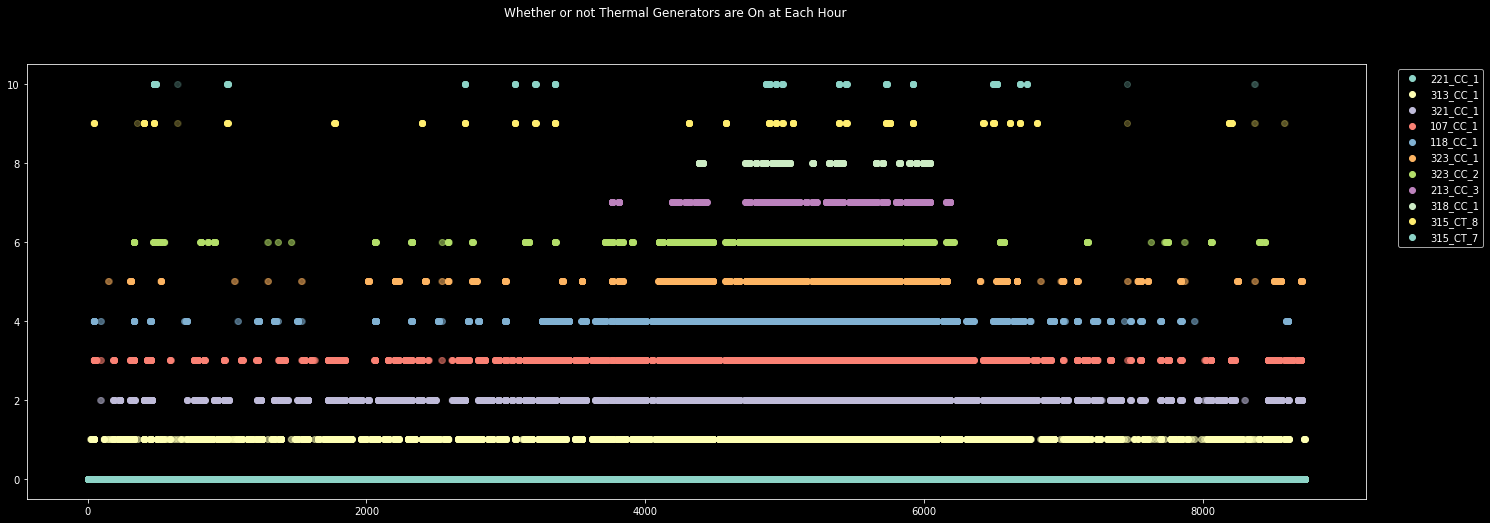

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(24, 8),sharex=True)
n = 0
for k, v in on_when_LMP_high.items():
    if "STEAM" not in k:
        if n > 10:
            break
        dispatch_total = [n if i > 0 else 0 for i in thermal_df[thermal_df['Generator'] == k]['Dispatch DA'].values]
        p = ax.scatter(range(8736), v['dispatched timesteps'] * n, label=k)
        ax.scatter(range(8736), dispatch_total, alpha=0.1, color=p.get_facecolor())
        n += 1
    
plt.legend(bbox_to_anchor=(1.02,1), loc="upper left")
plt.suptitle("Whether or not Thermal Generators are On at Each Hour")

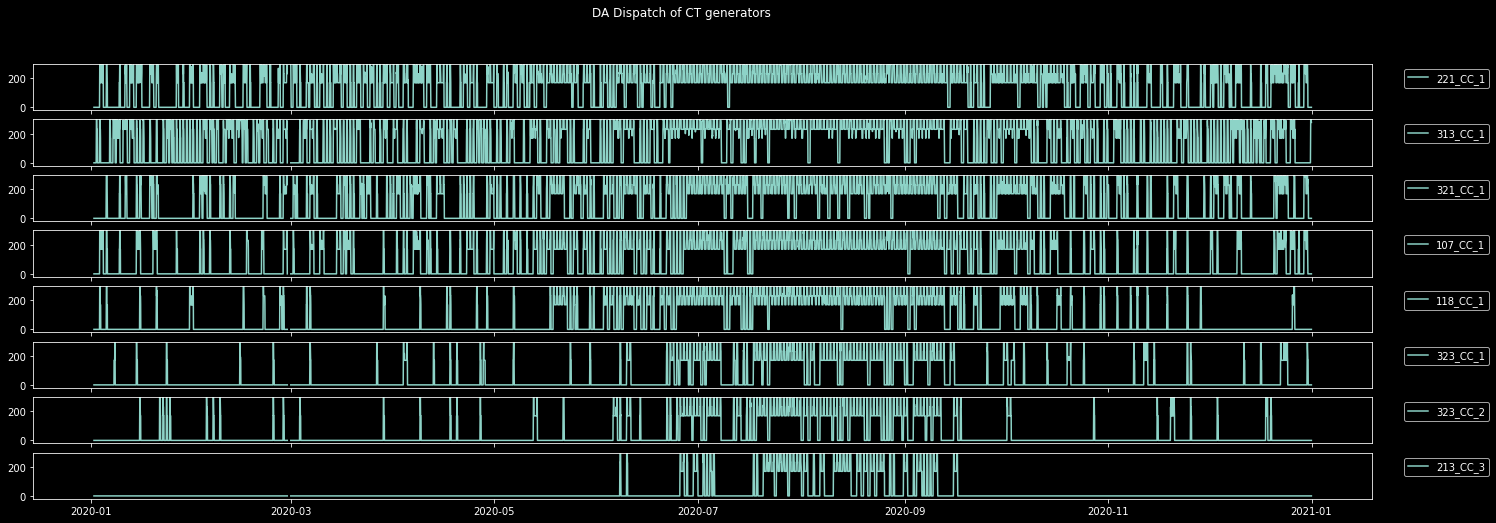

In [ ]:
df_thermal_dispatch_copy = df_thermal_dispatch.copy()
fig, ax = plt.subplots(8,1,figsize=(24, 8),sharex=True)
n = 0
for k, v in on_when_LMP_high.items():
    if n >= len(ax):
        df_thermal_dispatch_copy.drop(k+'-DADispatch', inplace=True, axis=1)
        df_thermal_dispatch_copy.drop(k+'-RTDispatch', inplace=True, axis=1)
        continue
    dispatch_total = df_thermal_dispatch_copy[k+"-DADispatch"].resample('1H').mean()
    # p = ax.scatter(range(8736), v['dispatched timesteps'] * n, label=k)
    # ax.scatter(range(8736), dispatch_total, alpha=0.1, color=p.get_facecolor())
    ax[n].plot(dispatch_total, label=k)
    ax[n].legend(bbox_to_anchor=(1.02,1), loc="upper left")
    ax[n].set_ylim(-20, 300)
    n += 1
    
    plt.suptitle("DA Dispatch of CT generators")

Text(0.5, 0.98, 'Wind DA and Curtailed')

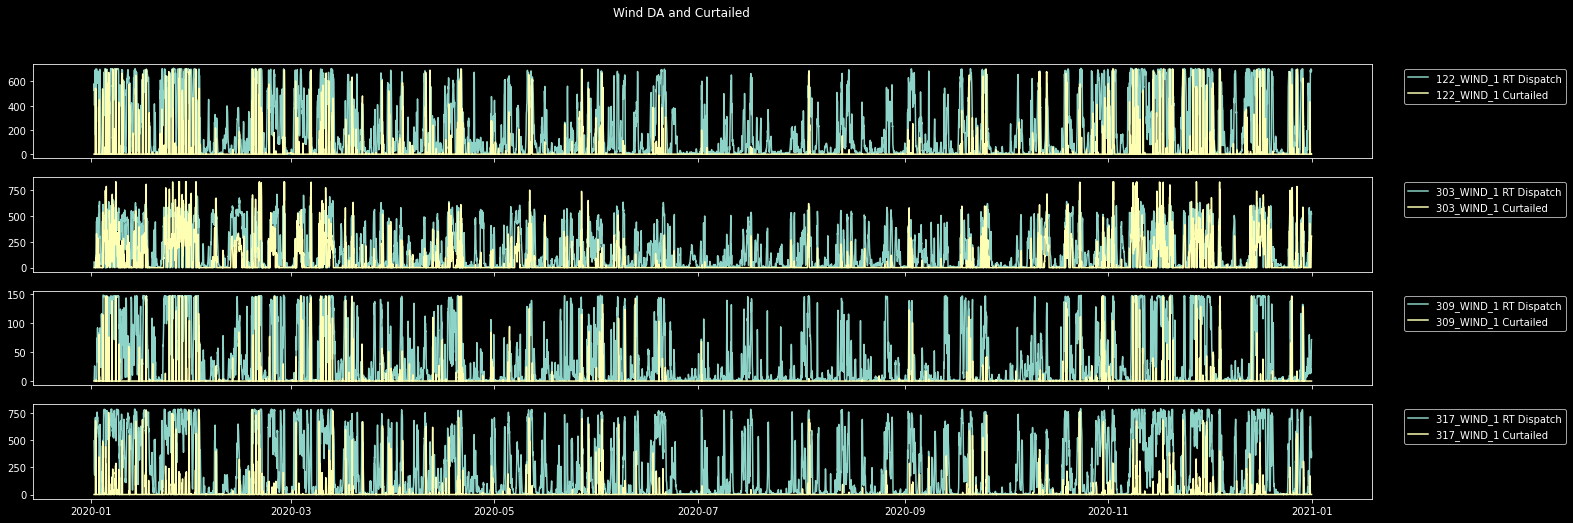

In [ ]:
fig, ax = plt.subplots(4,1,figsize=(24, 8),sharex=True)
n = 0
wind_gen = ('122_WIND_1', '303_WIND_1', '309_WIND_1', '317_WIND_1')

for k in wind_gen:
    dispatch_total = df_curtailment[k+"-RTDispatch"]
    p = ax[n].plot(dispatch_total, label=k+" RT Dispatch")
    ax[n].plot(df_curtailment[k+"-Curtailed"], label=k+" Curtailed")
    ax[n].legend(bbox_to_anchor=(1.02,1), loc="upper left")
    n += 1
    
plt.suptitle("Wind DA and Curtailed")

In [ ]:
# Compile Wind Power Forecast and Actuals and CF: take "forward window average" of RT
wind_rt_df = pd.read_csv(rts_gmlc_data.parent / "timeseries_data_files" / "WIND" / "REAL_TIME_wind.csv")
wind_df = pd.DataFrame(index=ix)
for k in wind_rt_df.columns:
    if "WIND" not in k:
        continue
    rt_wind = wind_rt_df[k].values[276: 276 + 8736 * 12]
    rt_wind = np.reshape(rt_wind, (8736, 12))
    rt_wind = rt_wind.mean(1)
    wind_df[k+"-RTPower"] = rt_wind

wind_da_df = pd.read_csv(rts_gmlc_data.parent / "timeseries_data_files" / "WIND" / "DAY_AHEAD_wind.csv")
for k in wind_da_df.columns:
    if "WIND" not in k:
        continue
    da_wind = wind_da_df[k].values[23:23 + 8736]
    wind_df[k+"-DAPower"] = da_wind

gen_df = pd.read_csv(rts_gmlc_data / "gen.csv")
for gen in wind_gen:
    wind_pmax = gen_df[gen_df['GEN UID'] == gen]['PMax MW'].values[0]
    wind_df[gen+"-RTCF"] = wind_df[gen+"-RTPower"] / wind_pmax
    wind_df[gen+"-DACF"] = wind_df[gen+"-DAPower"] / wind_pmax
wind_df

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
df_all = pd.concat([df_lmps, df_thermal_dispatch, df_curtailment, wind_df], axis=1)
df_all.to_csv(rts_gmlc_dir / "Wind_Thermal_Dispatch.csv")
print(df_all.columns)
df_all

Index(['107_CC_1-DADispatch', '107_CC_1-RTDispatch', '118_CC_1-DADispatch',
       '118_CC_1-RTDispatch', '221_CC_1-DADispatch', '221_CC_1-RTDispatch',
       '313_CC_1-DADispatch', '313_CC_1-RTDispatch', '321_CC_1-DADispatch',
       '321_CC_1-RTDispatch', '323_CC_1-DADispatch', '323_CC_1-RTDispatch',
       '323_CC_2-DADispatch', '323_CC_2-RTDispatch', '122_WIND_1-Curtailed',
       '122_WIND_1-DADispatch', '122_WIND_1-RTDispatch',
       '303_WIND_1-Curtailed', '303_WIND_1-DADispatch',
       '303_WIND_1-RTDispatch', '309_WIND_1-Curtailed',
       '309_WIND_1-DADispatch', '309_WIND_1-RTDispatch',
       '317_WIND_1-Curtailed', '317_WIND_1-DADispatch',
       '317_WIND_1-RTDispatch', '309_WIND_1-RTPower', '317_WIND_1-RTPower',
       '303_WIND_1-RTPower', '122_WIND_1-RTPower', '309_WIND_1-DAPower',
       '317_WIND_1-DAPower', '303_WIND_1-DAPower', '122_WIND_1-DAPower',
       '122_WIND_1-RTCF', '122_WIND_1-DACF', '303_WIND_1-RTCF',
       '303_WIND_1-DACF', '309_WIND_1-RTCF', '309_W

,107_CC_1-DADispatch,107_CC_1-RTDispatch,118_CC_1-DADispatch,118_CC_1-RTDispatch,221_CC_1-DADispatch,221_CC_1-RTDispatch,313_CC_1-DADispatch,313_CC_1-RTDispatch,321_CC_1-DADispatch,321_CC_1-RTDispatch,...,303_WIND_1-DAPower,122_WIND_1-DAPower,122_WIND_1-RTCF,122_WIND_1-DACF,303_WIND_1-RTCF,303_WIND_1-DACF,309_WIND_1-RTCF,309_WIND_1-DACF,317_WIND_1-RTCF,317_WIND_1-DACF
2020-01-02 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,...,141.1,568.4,0.738869,0.796636,0.064148,0.166588,0.005619,0.000674,0.619405,0.912401
2020-01-02 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,...,52.6,630.0,0.815907,0.882971,0.017355,0.062102,0.007867,0.005394,0.521368,0.947441
2020-01-02 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,...,17.4,672.3,0.648166,0.942256,0.009111,0.020543,0.102551,0.018206,0.292673,0.942811
2020-01-02 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,...,8.9,661.3,0.564564,0.926840,0.016175,0.010508,0.129692,0.076871,0.251366,0.918909
2020-01-02 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,...,7.0,654.0,0.563899,0.916608,0.021832,0.008264,0.175433,0.123399,0.224523,0.906270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,301.439221,355.0000,0.0,0.0,...,724.8,658.3,0.988741,0.922635,0.626476,0.855726,0.169813,0.764666,0.514026,0.897760
2020-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,314.242566,355.0000,0.0,0.0,...,784.2,677.5,0.952079,0.949544,0.764827,0.925856,0.189706,0.653405,0.512483,0.838443
2020-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,293.300000,355.0000,0.0,0.0,...,820.8,705.7,0.952605,0.989068,0.924124,0.969067,0.419813,0.873230,0.423643,0.851458
2020-12-31 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,288.647761,293.3000,0.0,0.0,...,829.3,709.5,0.956973,0.994394,0.979801,0.979103,0.471904,0.681726,0.498707,0.728194
